In [1]:
#Mount Google Drive to enable access to any directory on Drive inside the Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Setting up PySpark in Colab, designate where the installer should be located
%cd /content/drive/MyDrive/ML Project IDS575

/content/drive/MyDrive/ML Project IDS575


In [3]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

pd.options.display.float_format = '${:,.2f}'.format

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Sequential
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

In [101]:
import pandas as pd
df = pd.read_excel('ML_dataset.xlsx')


In [ ]:
df.head()

In [103]:
df['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [104]:
filtered_df = df

In [105]:
missing_values = filtered_df.isna().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Column1                     0
id.orig_p                   0
id.resp_p                   0
proto                       0
service                     0
flow_duration               0
fwd_pkts_tot                0
bwd_pkts_tot                0
fwd_data_pkts_tot           0
bwd_data_pkts_tot           0
fwd_pkts_per_sec            0
bwd_pkts_per_sec            0
flow_pkts_per_sec           0
down_up_ratio               0
fwd_header_size_tot         0
fwd_header_size_min         0
fwd_header_size_max         0
bwd_header_size_tot         0
bwd_header_size_min         0
bwd_header_size_max         0
flow_FIN_flag_count         0
flow_SYN_flag_count         0
flow_RST_flag_count         0
fwd_PSH_flag_count          0
bwd_PSH_flag_count          0
flow_ACK_flag_count         0
fwd_URG_flag_count          0
bwd_URG_flag_count          0
flow_CWR_flag_count         0
flow_ECE_flag_count         0
fwd_pkts_payload.min        0
fwd_pkts_payload.max        0
fwd_pkts_payl

In [106]:
filtered_df['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [107]:
filtered_df.shape

(123117, 85)

In [108]:
mapping = {
    "DOS_SYN_Hping": 1,
    "Thing_Speak": 2,
    "ARP_poisioning": 3,
    "MQTT_Publish": 4,
    "NMAP_UDP_SCAN": 5,
    "NMAP_XMAS_TREE_SCAN": 6,
    "NMAP_OS_DETECTION": 7,
    "NMAP_TCP_scan": 8,
    "DDOS_Slowloris": 9,
    "Wipro_bulb":10,
    "Metasploit_Brute_Force_SSH": 11,
    "NMAP_FIN_SCAN": 12
}
filtered_df['Attack_type']=filtered_df['Attack_type'].map(mapping)

In [109]:
filtered_df.shape

(123117, 85)

In [110]:
filtered_df['proto'].value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [111]:
mapping = {
    "tcp": 1,
    "udp": 2,
    "icmp": 3
}
filtered_df['proto']=filtered_df['proto'].map(mapping)

In [112]:
filtered_df['proto'].value_counts()

proto
1    110427
2     12633
3        57
Name: count, dtype: int64

In [113]:
filtered_df['service'].value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

In [114]:
mapping = {
    "-": 1,
    "dns": 2,
    "mqtt": 3,
    "http":4,
    "ssl":5,
    "ntp":6,
    "dhcp":7,
    "irc": 8,
    "ssh": 9,
    "radius": 10
}
filtered_df['service']=filtered_df['service'].map(mapping)

In [115]:
filtered_df['service'].value_counts()

service
1     102861
2       9753
3       4132
4       3464
5       2663
6        121
7         50
8         43
9         28
10         2
Name: count, dtype: int64

In [116]:
X=filtered_df.drop('Attack_type', axis=1)

In [117]:
X.shape

(123117, 84)

In [118]:
Y=filtered_df[['Attack_type']]

In [119]:
Y.shape

(123117, 1)

In [120]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

In [122]:
models = []
accuracy_scores = []

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score, roc_curve, precision_recall_curve, auc)

def train_and_evaluate_model(model):
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test data
    Y_pred = model.predict(X_test)

    # Print classification report
    report = classification_report(Y_test, Y_pred, output_dict=True)
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))

    # Extract overall precision, recall, f1-score
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    print(f"\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    # Calculate accuracy score
    accuracy = accuracy_score(Y_test, Y_pred)
    print("\nAccuracy Score:", accuracy)

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute ROC-AUC and PR-AUC scores for multi-class classification
    roc_auc_scores = []
    pr_auc_scores = []
    for i in range(len(model.classes_)):
        roc_auc = roc_auc_score(Y_test == model.classes_[i], Y_pred == model.classes_[i])
        roc_auc_scores.append(roc_auc)

        precision, recall, _ = precision_recall_curve(Y_test == model.classes_[i], Y_pred == model.classes_[i])
        pr_auc = auc(recall, precision)
        pr_auc_scores.append(pr_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(Y_test == model.classes_[i], Y_pred == model.classes_[i])
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc_scores[i]:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Plot precision-recall curve
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        precision, recall, _ = precision_recall_curve(Y_test == model.classes_[i], Y_pred == model.classes_[i])
        plt.plot(recall, precision, label=f'Class {model.classes_[i]} (AUC = {pr_auc_scores[i]:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    return accuracy


**Logistic** **Regression**

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18897
           2       0.94      0.96      0.95      1625
           3       0.95      0.94      0.94      1578
           4       1.00      1.00      1.00       871
           5       0.94      0.97      0.95       489
           6       1.00      0.99      1.00       384
           7       1.00      1.00      1.00       393
           8       1.00      1.00      1.00       220
           9       0.96      0.71      0.82       100
          10       0.98      0.79      0.88        58
          11       0.80      0.67      0.73         6
          12       0.67      0.67      0.67         3

    accuracy                           0.99     24624
   macro avg       0.94      0.89      0.91     24624
weighted avg       0.99      0.99      0.99     24624


Precision: 0.99, Recall: 0.99, F1-Score: 0.99

Accuracy Score: 0.9906189083820662


<Figure size 800x600 with 0 Axes>

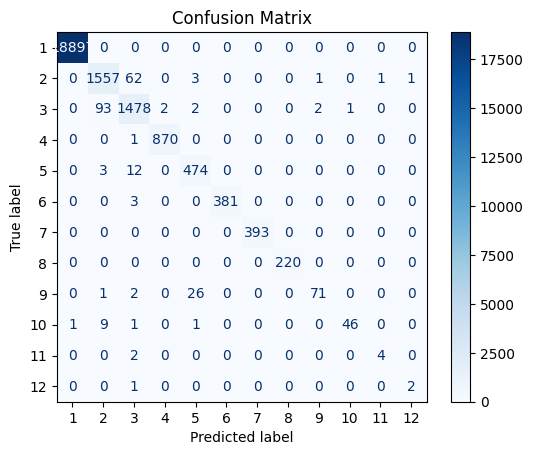

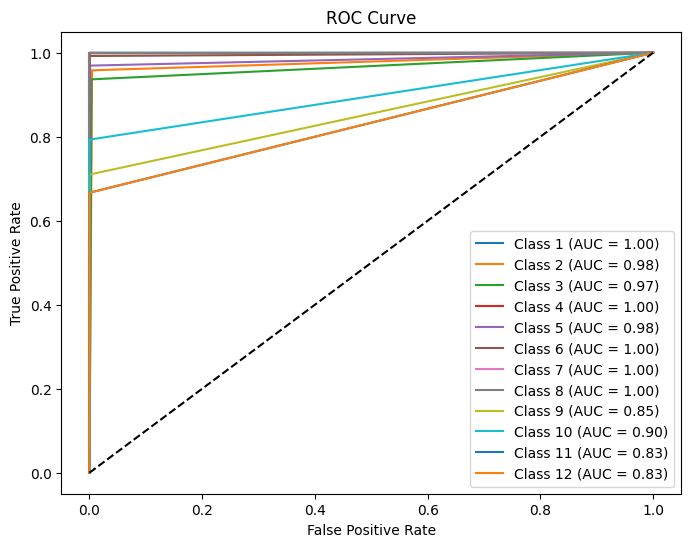

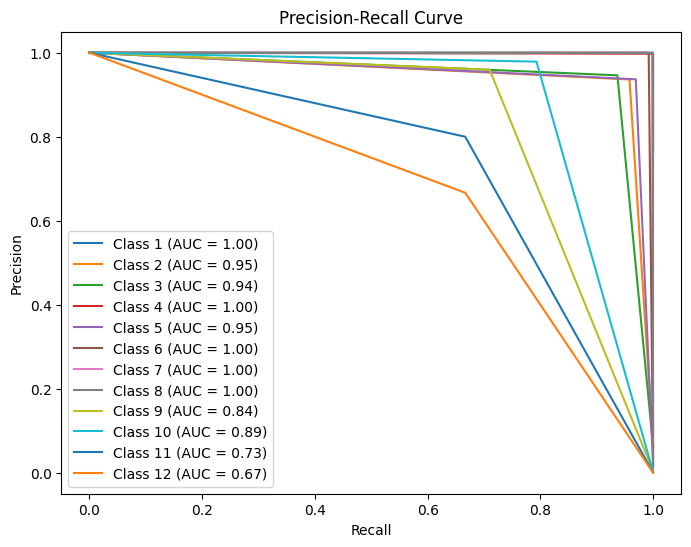

0.9906189083820662

In [143]:
train_and_evaluate_model(model1)

**K-Nearest Neighbors (KNN)**

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score# Initialize and train the k-NN model
# You might need to experiment with the value of 'n_neighbors' to find the optimal performance
k = 5  # Example starting point
model2 = KNeighborsClassifier(n_neighbors=k)
model2.fit(X_train, Y_train)


KNeighborsClassifier()

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18897
           2       0.97      0.98      0.98      1625
           3       0.97      0.97      0.97      1578
           4       0.99      1.00      0.99       871
           5       0.99      0.98      0.99       489
           6       1.00      0.99      1.00       384
           7       1.00      1.00      1.00       393
           8       1.00      1.00      1.00       220
           9       0.97      0.96      0.96       100
          10       1.00      0.78      0.87        58
          11       1.00      0.67      0.80         6
          12       0.67      0.67      0.67         3

    accuracy                           1.00     24624
   macro avg       0.96      0.92      0.94     24624
weighted avg       1.00      1.00      1.00     24624


Precision: 1.00, Recall: 1.00, F1-Score: 1.00

Accuracy Score: 0.9954922027290448


<Figure size 800x600 with 0 Axes>

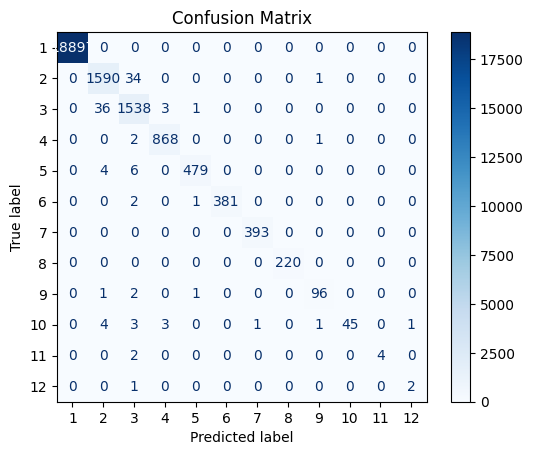

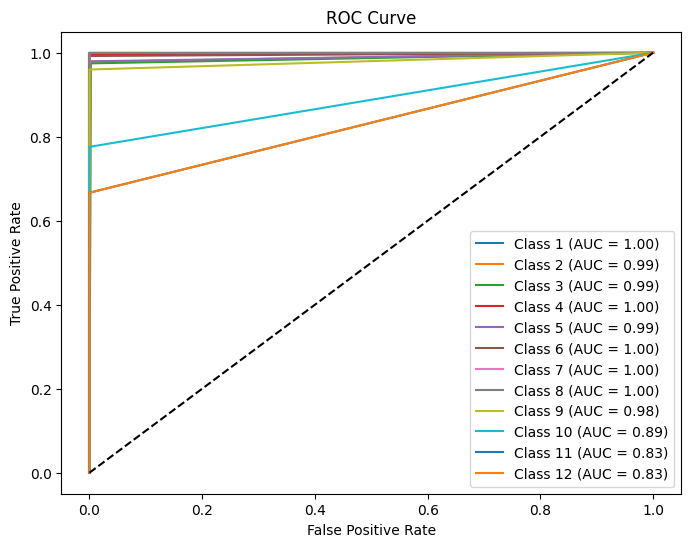

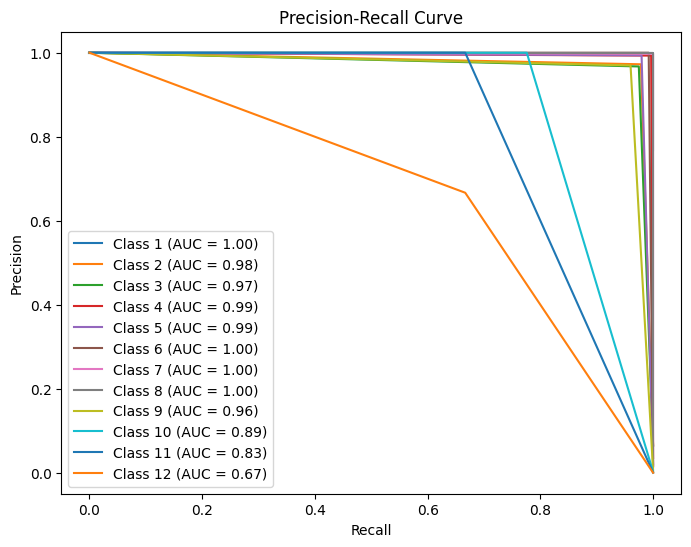

0.9954922027290448

In [145]:
train_and_evaluate_model(model2)

**Naive** **Bayes**

In [146]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, Y_train)


GaussianNB()

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18897
           2       0.77      0.87      0.82      1625
           3       0.97      0.43      0.59      1578
           4       1.00      0.99      0.99       871
           5       0.46      0.94      0.62       489
           6       1.00      0.99      1.00       384
           7       1.00      1.00      1.00       393
           8       1.00      1.00      1.00       220
           9       0.37      0.97      0.53       100
          10       0.52      0.29      0.37        58
          11       0.22      0.83      0.34         6
          12       0.07      0.67      0.12         3

    accuracy                           0.95     24624
   macro avg       0.70      0.83      0.70     24624
weighted avg       0.97      0.95      0.95     24624


Precision: 0.97, Recall: 0.95, F1-Score: 0.95

Accuracy Score: 0.95114522417154


<Figure size 800x600 with 0 Axes>

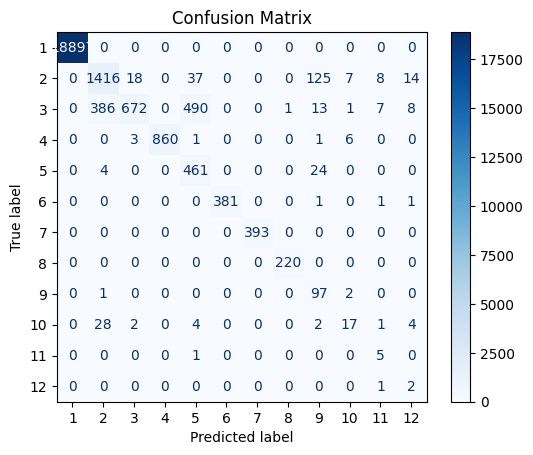

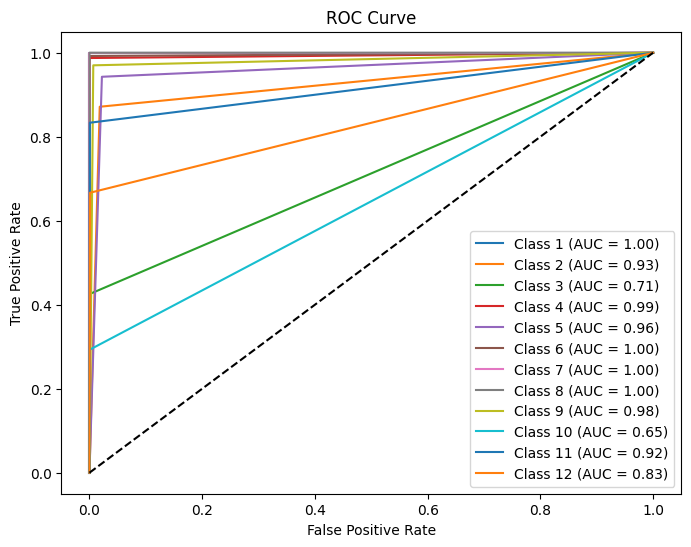

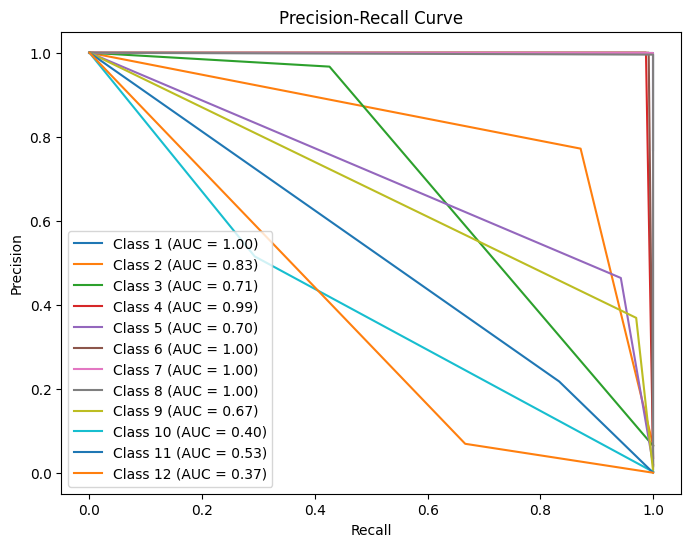

0.95114522417154

In [147]:
train_and_evaluate_model(model3)

**SVM** **Multiclass** **Classification**

In [148]:
from sklearn.svm import SVC
# Initialize the SVM classifier
model4 = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')

# Train the classifier on the training data
model4.fit(X_train, Y_train)


SVC()

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18897
           2       0.98      0.96      0.97      1625
           3       0.94      0.98      0.96      1578
           4       1.00      0.99      1.00       871
           5       0.95      0.97      0.96       489
           6       1.00      0.99      1.00       384
           7       1.00      1.00      1.00       393
           8       1.00      1.00      1.00       220
           9       1.00      0.71      0.83       100
          10       1.00      0.62      0.77        58
          11       1.00      0.67      0.80         6
          12       0.67      0.67      0.67         3

    accuracy                           0.99     24624
   macro avg       0.96      0.88      0.91     24624
weighted avg       0.99      0.99      0.99     24624


Precision: 0.99, Recall: 0.99, F1-Score: 0.99

Accuracy Score: 0.9929743339831059


<Figure size 800x600 with 0 Axes>

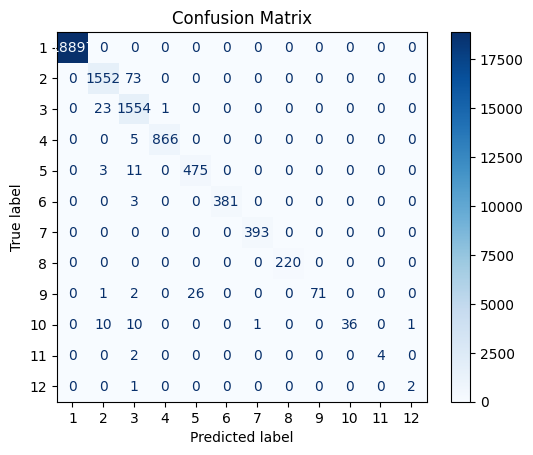

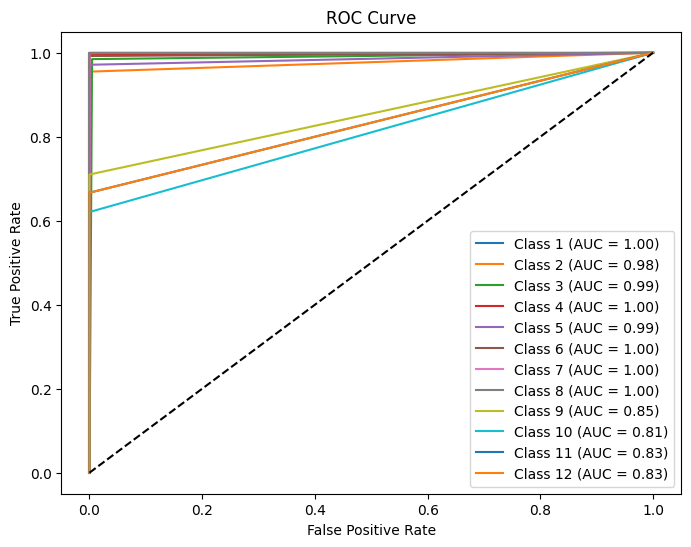

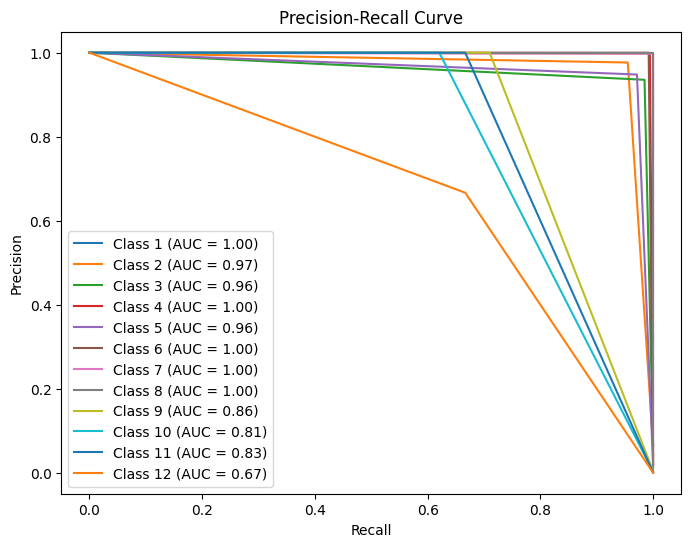

0.9929743339831059

In [149]:
train_and_evaluate_model(model4)

**Linear Discriminant Analysis**

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Initialize the Linear Discriminant Analysis model
model5 = LinearDiscriminantAnalysis()

# Train the model
model5.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18897
           2       0.83      0.91      0.87      1625
           3       0.89      0.74      0.81      1578
           4       0.99      1.00      0.99       871
           5       0.98      0.86      0.92       489
           6       1.00      0.99      1.00       384
           7       0.97      1.00      0.99       393
           8       0.91      1.00      0.95       220
           9       0.49      0.97      0.65       100
          10       1.00      0.55      0.71        58
          11       0.10      0.67      0.17         6
          12       0.22      0.67      0.33         3

    accuracy                           0.97     24624
   macro avg       0.78      0.86      0.78     24624
weighted avg       0.98      0.97      0.97     24624


Precision: 0.98, Recall: 0.97, F1-Score: 0.97

Accuracy Score: 0.973399935022742


<Figure size 800x600 with 0 Axes>

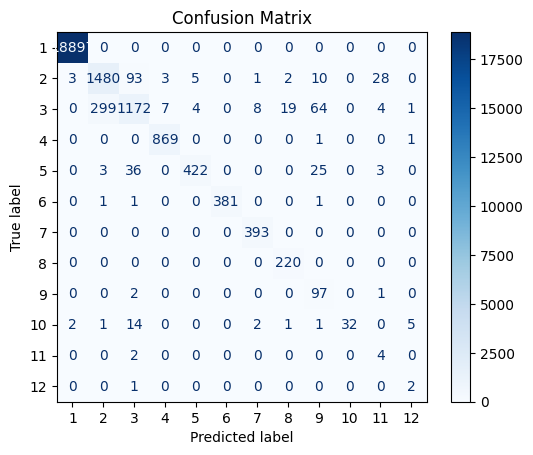

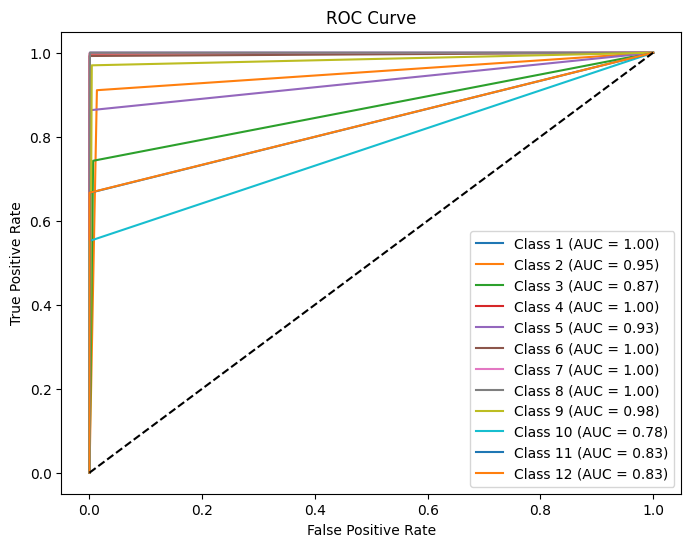

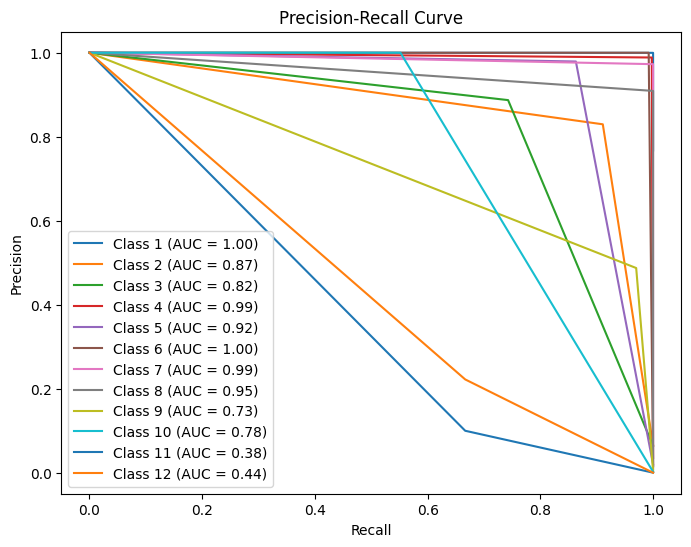

0.973399935022742

In [151]:
train_and_evaluate_model(model5)

**K** **means** **Clustering**

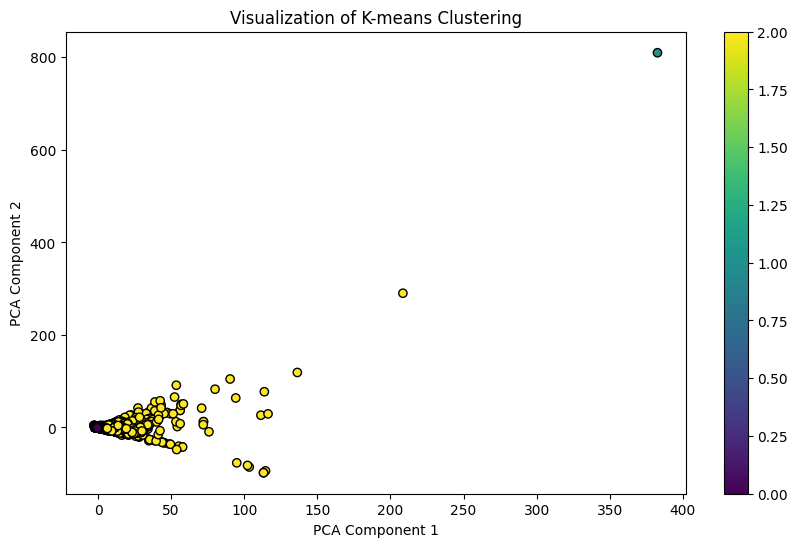

In [152]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Feature scaling
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_Scale)
labels = kmeans.labels_

# Plotting - this part assumes you have a way to reduce the dimensions to 2D if your data has more than two dimensions
from sklearn.decomposition import PCA

pca_kmeans = PCA(n_components=2)
X_pca_kmeans = pca_kmeans.fit_transform(X_Scale)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_kmeans[:, 0], X_pca_kmeans[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.colorbar()
plt.title('Visualization of K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()